<a href="https://colab.research.google.com/github/Jung0Jin/Python_Machine_Learning/blob/master/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B5%90%EA%B3%BC%EC%84%9C2%EC%9E%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2장 간단한 분류 알고리즘 훈련

퍼셉트론과 적응형 선형 뉴런을 사용한다.

퍼셉트론을 구현하고 붓꽃 데이터셋에서 훈련하여 분류한다.

분류를 위한 머신러닝 개념을 알고, 효율적인 구현 방법을 익힌다.

머신 러닝 알고리즘을 직관적으로 이해하기

판다스, 넘파이, 맷플롯립으로 데이터 읽고 처리하고 시각화

선형 분류 알고리즘 구현하기

## 2.1 인공 뉴런 : 초기 머신 러닝의 간단한 역사

맥컬록-피츠(MCP) 뉴런 : 신경 세포를 이진 출력을 내는 간단한 논리 회로로 표현

프랑크 로젠블라트(Frank Rosenblatt) : MCP 뉴런 모델을 기반으로 퍼셉트론 학습 개념을 발표

### 2.1.1 인공 뉴런의 수학적 정의


### 2.1.2 퍼셉트론 학습 규칙

## 2.2 파이썬으로 퍼셉트론 학습 알고리즘 구현

### 2.2.1 객체 지향 퍼셉트론 API

In [0]:
import numpy as np

class Perceptron(object):
  """퍼셉트론 분류기
  
  매개변수
  ----------
  eta : float
    학습률 (0과 1사이)
  n_iter : int
    훈련 데이터셋 반복 횟수
  random_state : int
    가중치 무작위 초기화를 위한 난수 생성기 시드
    
  속성
  ----------
  w_ : 1d-array
    학습된 가중치
  errors_ : list
    에포크마다 누적된 분류 오류
  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta # 학습률 에타
    self.n_iter = n_iter # epoch
    self.random_state = random_state # 랜덤 시드(seed)로 다시 실행해도 이전과 동일한 결과를 재현함
  
  def fit(self, X, y):
    """훈련 데이터 학습

    매개변수
    ----------
    X : {array-like}, shape = [n_samples, n_features]
      n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    y : array-like, shape = [n_samples]
      타깃 값

    반환값
    ----------
    self : object
    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # 평균을 loc로 표준편차를 scale로 갖는 정규분포 생성 # 아래 보충 설명 # 벡터의 모든 원소가 0이 되는 것을 피하기 위해 랜덤한 작은 값을 얻고자 한것이다.
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y): # list(zip([1, 2, 3], [4, 5, 6])) -> [(1, 4), (2, 5), (3, 6)]
        update = self.eta * (target - self.predict(xi)) 
        self.w_[1:] += update * xi
        self.w_[0] += update # 절편
        errors += int(update != 0.0) # epoch마다 잘못 분류된 횟수를 기록한다.
      self.errors_.append(errors)
    return self

  def net_input(self, X):
    """최종 입력 계산"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
    return np.where(self.net_input(X) >= 0.0, 1, -1) # 아래 보충 설명


self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) 에 대한 보충 설명

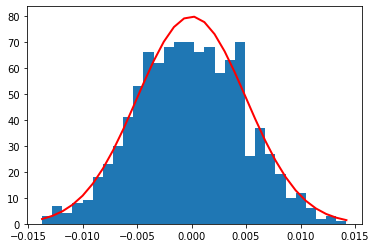

In [69]:
import numpy as np
mu, sigma = 0, 0.005 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30)
plt.plot(bins,
         1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2,
         color='r')
plt.show()

np.where(self.net_input(X) >= 0.0, 1, -1) 에 대한 보충 설명

In [70]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
np.where(a < 5, a, 10*a)

array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])

In [72]:
np.where(a < 5, 1, -1)

array([ 1,  1,  1,  1,  1, -1, -1, -1, -1, -1])

### 2.2.2 붓꽃 데이터셋에서 퍼셉트론 훈련

In [0]:
from sklearn.datasets import load_iris

Iris = load_iris()

In [74]:
import pandas as pd

Iris_Data = pd.DataFrame(data=np.c_[Iris['data'],
                                    Iris['target']],
                         columns=Iris['feature_names'] + ['target'])
Iris_Data['target'] = Iris_Data['target'].map({0:'setosa',
                                               1:'versicolor',
                                               2:'virginica'})
Iris_Data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
import matplotlib.pyplot as plt

In [76]:
# target값은 setosa, versicolor, virginica
Iris_Data['target'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [77]:
# target값은 setosa 와 versicolor를 뽑아오자
y = Iris_Data.iloc[0:100, 4].values
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [78]:
y = np.where(y == 'setosa', -1, 1) # setosa가 맞으면 -1 아니면 1
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [79]:
# 꽃받침 길이 : sepal length, 꽃잎 길이 : petal length를 가져오자
X = Iris_Data.iloc[0:100, [0, 2]].values
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

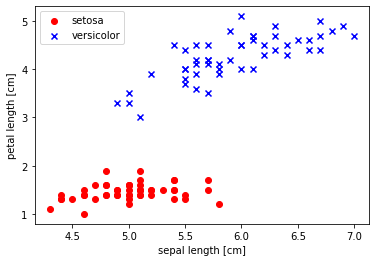

In [80]:
# 산점도를 그리자
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

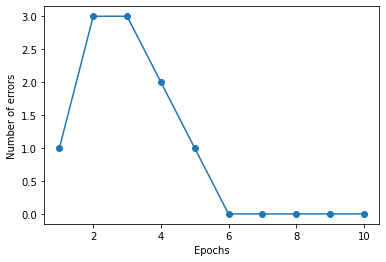

In [81]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  
  # 마커와 컬러맵을 설정합니다
  markers = ('s','x','o','^','v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 결정 경계를 그립니다
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

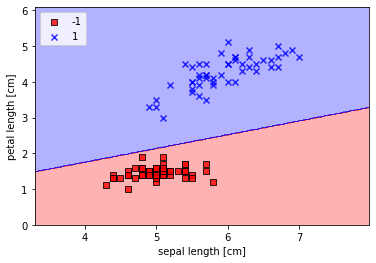

In [83]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## 2.3 적응형 선형 뉴런과 학습의 수렴

아달린(Adaline)과 퍼셉트론의 가장 큰 차이점 : 가중치를 업데이트하는데 퍼센트론은 단위 계단 함수를, 아달린은 선형 활성화 함수를 사용한다.

### 2.3.1 경사 하강법으로 비용 함수 최소화

###2.3.2 파이썬으로 아달린 구현

In [0]:
class AdalineGD(object):
  """적응형 선형 뉴런 분류기

  매개변수
  ----------
  eta : float
    학습률 (0과 1 사이)
  n_iter : int
    훈련 데이터셋 반복 횟수
  random_state : int
    가중치 무작위 초기화를 위한 난수 생성기 시드

  속성
  ----------
  w_ : 1d-array
    학습된 가중치
  cost_ : list
    에포크마다 누적된 비용 함수의 제곱합

  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """훈련 데이터 학습

    매개변수
    ----------
    X : {array-like}, shape = [n_samples, n_features]
      n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    y : array-like, shape = [n_samples]
      타깃 값
      
    반환값
    ----------
    self : object

    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0 ,scale=0.01,
                          size=1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = y - output
      self.w_[1:] += self.eta * X.T.dot(errors) # 가중치 1에서 m까지
      self.w_[0] += self.eta * errors.sum() # 절편
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    """최종 입력 계산"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    """선형 활성화 계산"""
    return X
  
  def predict(self, X):
    """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
    return np.where(self.activation(self.net_input(X))
    >= 0.0, 1, -1)

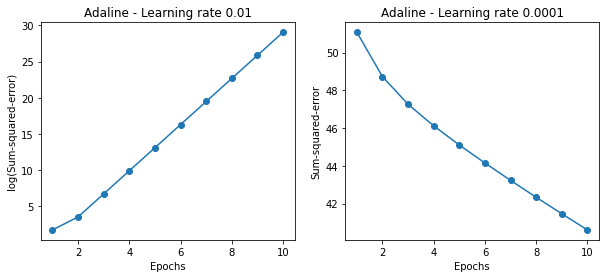

In [87]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
           np.log10(ada1.cost_), marker='o') # 값이 너무 커서 log 씌어준거다
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
           ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

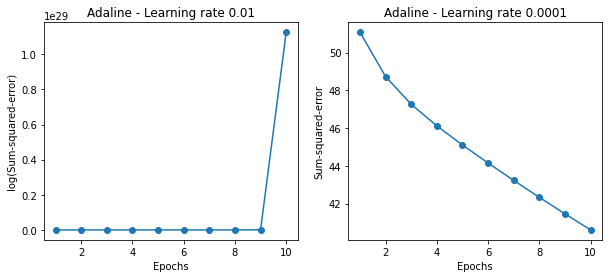

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
           ada1.cost_, marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
           ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

###2.3.3 특성 스케일을 조정하여 경사 하강법 결과 향상

In [0]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / x[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / x[:,1].std()

In [91]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

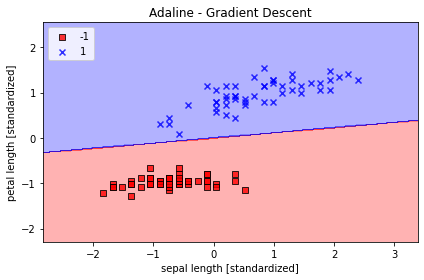

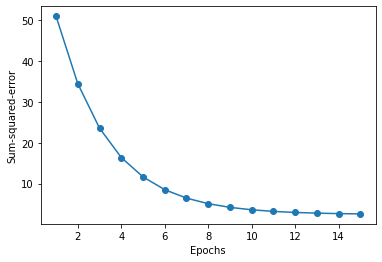

In [95]:
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

### 2.3.4 대규모 머신 러닝과 확률적 경사 하강법

In [0]:
class AdalineSGD(object):
  """ADAptive LInear NEuron 분류기

  매개변수
  ----------
  eta : float
    학습률 (0과 1 사이)
  n_iter : int
    훈련 데이터셋 반복 횟수
  shuffle : bool (default: True)
    True로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞습니다
  random_state : int
    가중치 무작위 초기화를 위한 난수 생성기 시드

  속성
  ----------
  w_ : 1d-array
    학습된 가중치
  cost_ : list
    모든 훈련 샘플에 대해 에포크마다 누적된 평균 비용 함수의 제곱합

  """
  def __init__(self, eta=0.01, n_iter=10,
               shuffle=True, random_state=None):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initalized = False
    self.shuffle = shuffle
    self.random_state = random_state

  def fit(self, X, y):
    """훈련 데이터 학습

    매개변수
    ----------
    X : {array-like}, shape = [n_samples, n_features]
      n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    y : array-like, shape = [n_samples]
      타깃 벡터

    반환값
    ----------
    self : object

    """
    self._initialize_weights(X.shape[1])
    self.cost_ = []
    for i in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)
      cost = []
      for xi, target in zip(X, y):
        cost.append(self._update_weights(xi, target))
      avg_cost = sum(cost) / len(y)
      self.cost_.append(avg_cost)
    return self

  def partial_fit(self, X, y):
    """가중치를 다시 초기화하지 않고 훈련 데이터를 학습합니다"""
    if not self.w_initialized:
      self._initialize_weights(X.shape[1])
    if y.ravel().shape[0] > 1:
      for xi, target in zip(X, y):
        self._update_weights(xi, target)
    else:
      self._update_weights(X, y)
    return self

  def _shuffle(self, X, y):
    """훈련 데이터를 섞습니다"""
    r = self.rgen.permutation(len(y)) # len(y)만큼 중복되지 않은 랜덤한 숫자 생성
    return X[r], y[r]

  def _initialize_weights(self, m):
    """랜덤한 작은 수로 가중치를 초기화합니다"""
    self.rgen = np.random.RandomState(self.random_state)
    self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
                               size=1 + m)
    self.w_initialized = True

  def _update_weights(self, xi, target):
    """아달린 학습 규칙을 적용하여 가중치를 업데이트합니다"""
    output = self.activation(self.net_input(xi))
    error = target - output
    self.w_[1:] += self.eta * xi.dot(error)
    self.w_[0] += self.eta * error
    cost = 0.5 * error**2
    return cost

  def net_input(self, X):
    """최종 입력 계산"""
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, X):
    """선형 활성화 계산"""
    return X
  
  def predict(self, X):
    """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
    return np.where(self.activation(self.net_input(X))
    >= 0.0, 1, -1)

In [99]:
np.random.permutation(10)

array([5, 0, 8, 4, 7, 1, 9, 3, 6, 2])

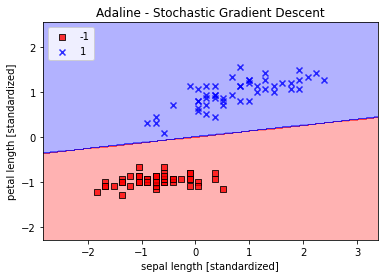

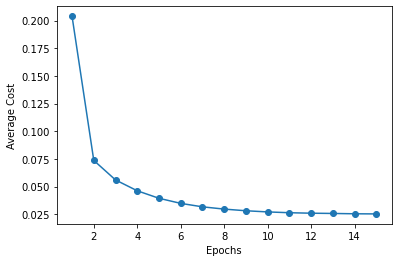

In [102]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()